In [2]:
import pandas as pd
import joblib

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import accuracy_score
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB

In [3]:
df = pd.read_csv("dataset_bmi_500.csv")
df.head(10)



,id,gender,tinggi,berat,imt,label
0,1,P,154,76,32.05,Obesitas
1,2,L,172,92,31.10,Obesitas
2,3,P,164,102,37.92,Obesitas
3,4,L,165,56,20.57,Normal
4,5,P,147,45,20.82,Normal
5,6,P,153,82,35.03,Obesitas
6,7,P,165,116,42.61,Obesitas
7,8,P,155,107,44.54,Obesitas
8,9,L,177,116,37.03,Obesitas
9,10,P,147,89,41.19,Obesitas


In [4]:
df['gender'] = df['gender'].map({'L': 0, 'P': 1})
df.head(10)

,id,gender,tinggi,berat,imt,label
0,1,1,154,76,32.05,Obesitas
1,2,0,172,92,31.10,Obesitas
2,3,1,164,102,37.92,Obesitas
3,4,0,165,56,20.57,Normal
4,5,1,147,45,20.82,Normal
5,6,1,153,82,35.03,Obesitas
6,7,1,165,116,42.61,Obesitas
7,8,1,155,107,44.54,Obesitas
8,9,0,177,116,37.03,Obesitas
9,10,1,147,89,41.19,Obesitas


In [5]:
# menghapus atribut tidak relevan
df = df.drop(columns=['id'])


In [6]:
le = LabelEncoder()
df['label_enc'] = le.fit_transform(df['label'])

X = df[['gender', 'tinggi', 'berat', 'imt']]
y = df['label_enc']
df.head(10)

,gender,tinggi,berat,imt,label,label_enc
0,1,154,76,32.05,Obesitas,2
1,0,172,92,31.10,Obesitas,2
2,1,164,102,37.92,Obesitas,2
3,0,165,56,20.57,Normal,1
4,1,147,45,20.82,Normal,1
5,1,153,82,35.03,Obesitas,2
6,1,165,116,42.61,Obesitas,2
7,1,155,107,44.54,Obesitas,2
8,0,177,116,37.03,Obesitas,2
9,1,147,89,41.19,Obesitas,2


In [7]:
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)
df.head(15)

,gender,tinggi,berat,imt,label,label_enc
0,1,154,76,32.05,Obesitas,2
1,0,172,92,31.10,Obesitas,2
2,1,164,102,37.92,Obesitas,2
3,0,165,56,20.57,Normal,1
4,1,147,45,20.82,Normal,1
5,1,153,82,35.03,Obesitas,2
6,1,165,116,42.61,Obesitas,2
7,1,155,107,44.54,Obesitas,2
8,0,177,116,37.03,Obesitas,2
9,1,147,89,41.19,Obesitas,2


In [8]:
from sklearn.preprocessing import StandardScaler

# fitur numerik
num_features = ['tinggi', 'berat', 'imt']

scaler = StandardScaler()

# fit hanya pada data latih
X_train[num_features] = scaler.fit_transform(X_train[num_features])

# transform data uji
X_test[num_features] = scaler.transform(X_test[num_features])


In [9]:
# simpan salinan sebelum normalisasi
X_train_before = X_train.copy()

# tampilkan sebelum
print("=== SEBELUM NORMALISASI ===")
print(X_train_before[num_features].head())

# tampilkan sesudah
print("\n=== SESUDAH NORMALISASI ===")
print(X_train[num_features].head())


=== SEBELUM NORMALISASI ===
       tinggi     berat       imt
249 -1.452309  0.305780  1.112913
433 -1.286212  0.263103  0.950865
19   1.371337 -0.974527 -1.324204
322  1.205240  0.903257  0.181137
332  1.620482  0.647195 -0.187736

=== SESUDAH NORMALISASI ===
       tinggi     berat       imt
249 -1.452309  0.305780  1.112913
433 -1.286212  0.263103  0.950865
19   1.371337 -0.974527 -1.324204
322  1.205240  0.903257  0.181137
332  1.620482  0.647195 -0.187736


In [10]:
print(X_train[num_features].mean())
print(X_train[num_features].std())


tinggi   -9.503509e-16
berat     2.697842e-16
imt      -3.497203e-16
dtype: float64
tinggi    1.001252
berat     1.001252
imt       1.001252
dtype: float64


In [12]:
logreg = LogisticRegression(max_iter=1000)
logreg.fit(X_train, y_train)
pred_logreg = logreg.predict(X_test)

d:\conda\envs\tf310\lib\site-packages\sklearn\linear_model\_logistic.py:473: ConvergenceWarning: lbfgs failed to converge after 1000 iteration(s) (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT

Increase the number of iterations to improve the convergence (max_iter=1000).
You might also want to scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [13]:
svm = SVC(kernel='rbf')
svm.fit(X_train, y_train)
pred_svm = svm.predict(X_test)


In [14]:
nb = GaussianNB()
nb.fit(X_train, y_train)
pred_nb = nb.predict(X_test)

In [15]:
from sklearn.metrics import (
    accuracy_score,
    precision_score,
    recall_score,
    f1_score,
    classification_report
)


In [16]:
models = {
    "Logistic Regression": pred_logreg,
    "SVM": pred_svm,
    "Naive Bayes": pred_nb
}

for name, pred in models.items():
    print(f"\n=== {name} ===")
    print("Accuracy :", accuracy_score(y_test, pred))
    print("Precision:", precision_score(y_test, pred, average='weighted'))
    print("Recall   :", recall_score(y_test, pred, average='weighted'))
    print("F1-score :", f1_score(y_test, pred, average='weighted'))



=== Logistic Regression ===
Accuracy : 0.99
Precision: 0.9907142857142857
Recall   : 0.99
F1-score : 0.9900689061154176

=== SVM ===
Accuracy : 0.84
Precision: 0.8773237179487178
Recall   : 0.84
F1-score : 0.8284319623392151

=== Naive Bayes ===
Accuracy : 0.95
Precision: 0.954945054945055
Recall   : 0.95
F1-score : 0.9513582142915185


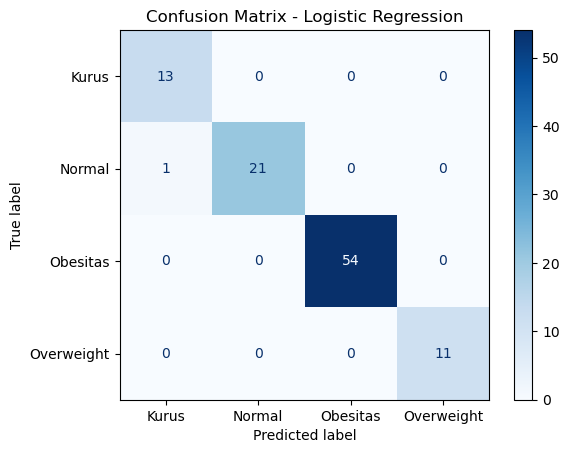

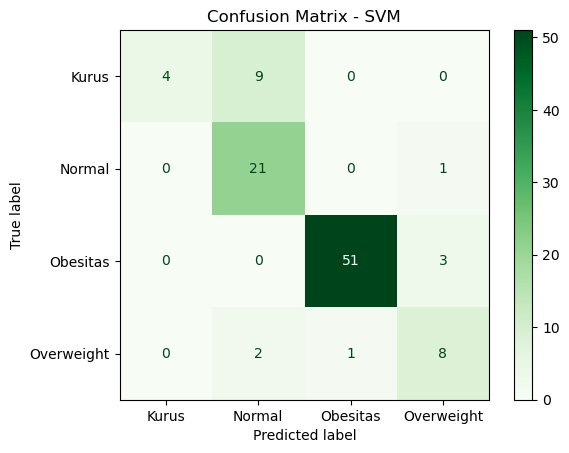

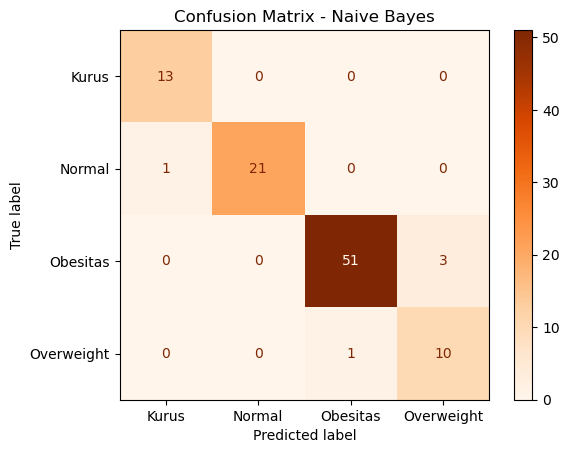

In [25]:
import matplotlib.pyplot as plt
from sklearn.metrics import ConfusionMatrixDisplay

# Logistic Regression
ConfusionMatrixDisplay.from_predictions(
    y_test, pred_logreg,
    display_labels=le.classes_,
    cmap="Blues"
)
plt.title("Confusion Matrix - Logistic Regression")
plt.show()

# SVM
ConfusionMatrixDisplay.from_predictions(
    y_test, pred_svm,
    display_labels=le.classes_,
    cmap="Greens"
)
plt.title("Confusion Matrix - SVM")
plt.show()

# Naive Bayes
ConfusionMatrixDisplay.from_predictions(
    y_test, pred_nb,
    display_labels=le.classes_,
    cmap="Oranges"
)
plt.title("Confusion Matrix - Naive Bayes")
plt.show()


In [26]:
# =========================
# RANDOM FOREST CLASSIFIER
# =========================

from sklearn.ensemble import RandomForestClassifier

# inisialisasi model
rf_model = RandomForestClassifier(
    n_estimators=200,         # jumlah pohon
    max_depth=None,           # kedalaman pohon
    random_state=42,
    class_weight="balanced",  # untuk data tidak seimbang
    n_jobs=-1
)

# training model
rf_model.fit(X_train, y_train)

print("Random Forest training selesai")


Random Forest training selesai


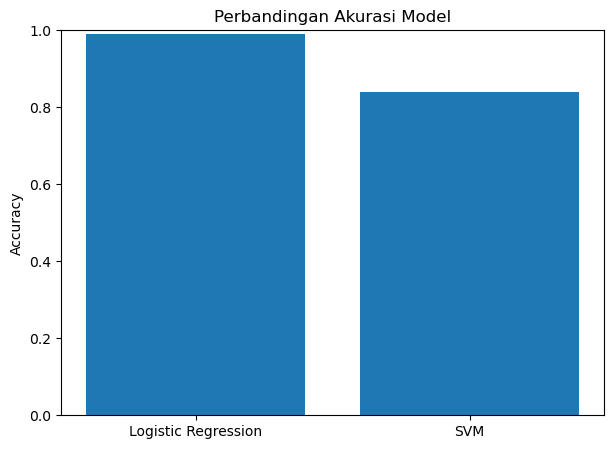

In [31]:
accuracy_logreg = accuracy_score(y_test, pred_logreg)
accuracy_svm = accuracy_score(y_test, pred_svm)
accuracy_nb = accuracy_score(y_test, pred_nb)
accuracy_rf = accuracy_score(y_test, pred_nb)

models = ['Logistic Regression', 'SVM']
accuracies = [accuracy_logreg, accuracy_svm,]

plt.figure(figsize=(7,5))
plt.bar(models, accuracies)
plt.ylim(0,1)
plt.ylabel("Accuracy")
plt.title("Perbandingan Akurasi Model")
plt.show()


In [32]:
print("\n=== CLASSIFICATION REPORT - LOGISTIC REGRESSION ===")
print(classification_report(y_test, pred_logreg, target_names=le.classes_))

print("\n=== CLASSIFICATION REPORT - SVM ===")
print(classification_report(y_test, pred_svm, target_names=le.classes_))




=== CLASSIFICATION REPORT - LOGISTIC REGRESSION ===
              precision    recall  f1-score   support

       Kurus       0.93      1.00      0.96        13
      Normal       1.00      0.95      0.98        22
    Obesitas       1.00      1.00      1.00        54
  Overweight       1.00      1.00      1.00        11

    accuracy                           0.99       100
   macro avg       0.98      0.99      0.98       100
weighted avg       0.99      0.99      0.99       100


=== CLASSIFICATION REPORT - SVM ===
              precision    recall  f1-score   support

       Kurus       1.00      0.31      0.47        13
      Normal       0.66      0.95      0.78        22
    Obesitas       0.98      0.94      0.96        54
  Overweight       0.67      0.73      0.70        11

    accuracy                           0.84       100
   macro avg       0.83      0.73      0.73       100
weighted avg       0.88      0.84      0.83       100



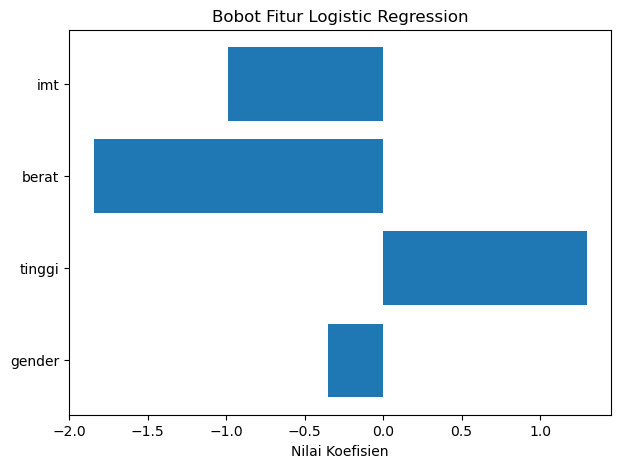

In [29]:
coef = logreg.coef_[0]
features = X.columns

df_coef = pd.DataFrame({
    "Fitur": features,
    "Bobot": coef
})

plt.figure(figsize=(7,5))
plt.barh(df_coef["Fitur"], df_coef["Bobot"])
plt.title("Bobot Fitur Logistic Regression")
plt.xlabel("Nilai Koefisien")
plt.show()


In [30]:
print("Logistic Regression Accuracy:", accuracy_score(y_test, pred_logreg))
print("SVM Accuracy:", accuracy_score(y_test, pred_svm))
print("Naive Bayes Accuracy:", accuracy_score(y_test, pred_nb))
print("Random Forest:", accuracy_score(y_test, pred_nb))

Logistic Regression Accuracy: 0.99
SVM Accuracy: 0.84
Naive Bayes Accuracy: 0.95
Random Forest: 0.95


In [10]:
joblib.dump(logreg, "model_logreg.pkl")
joblib.dump(svm, "model_svm.pkl")
joblib.dump(nb, "model_nb.pkl")
joblib.dump(le, "label_encoder.pkl")

['label_encoder.pkl']